In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install folium

In [5]:
"""
This is a search platform for international students to help them find housing based on their preferences liek budget,
 university proximity, Apartment or Kolegium, share the house or not etc.
The program uses fast algorithms sorting and searching that can handle big datasets as well and also implementing
visualization techniques to make the platform more interactive and user-friendly.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
"""I am using Quick sort as my sorting algorithm because of its really good time complexity in comparison to some other 
sorting algorithms like bubble sort.
"""


def partition(houses, low, high):
    """Partition function is a helper function for quicksort algorithm.
    It partitions the houses list around a pivot(chosen as the last element)
    so the elements <= pivot are on the left and > on the right.

    It returns the Index position of the pivot element
    """
    pivot = houses[high].Price
    i = low - 1

    for j in range(low, high):
        if houses[j].Price <= pivot:
            i += 1
            houses[i], houses[j] = houses[j], houses[i]

    houses[i + 1], houses[high] = houses[high], houses[i + 1]
    return i + 1


def quicksort(houses, low=0, high=None):
    if high is None:
        high = len(houses) - 1

    if low < high:
        pivot_index = partition(houses, low, high)
        quicksort(houses, low, pivot_index - 1)
        quicksort(houses, pivot_index + 1, high)

    return houses


In [7]:
class House:
    """ This class represents a house or apartment listing
    The attributes it has are:
    Price
    Area
    Square meters of the house
    Type of house (default is Apartment)
    Shared or Not
    Availability
    Available from
    If it's close to the User's University
    """

    def __init__(self, Price, Area, sqm, Sharedornot, Availablefrom, ClosetoUni):
        if not isinstance(Price, (int, float)):
            raise TypeError("Only numbers please!")

        self.Price = Price
        self.Area = Area
        self.sqm = sqm
        self.Type = 'Apartment'
        self.Shared = Sharedornot
        self.Availability = True
        self.Available_from = Availablefrom
        self.Close_to_Uni = ClosetoUni

    def Not_Available(self):  # Method of the class so a house can become unavailable for the students.
        self.Availability = False

    def __str__(self):
        Shared_status = 'shared' if self.Shared.lower() == 'yes' else 'not shared'
        return f'There is an {self.Type} room available in {self.Area} near {self.Close_to_Uni}.' \
               f' The room is {self.sqm} sqm and the kitchen is {Shared_status}.' \
               f' Rent per month is: {self.Price} euros and is available from {self.Available_from}. '


class Kolegium(House):
    """ Here the Kolegium class is a child class of House (Parent class)
    It has the same attributes of House as we use inheritance and I added some extras.
    This specific Type of house can also take attributes such as:
    Share the kitchen or Not
    Share the bathroom or Not
    And the number of rooms.
    """

    def __init__(self, SharedKitchen, SharedBathroom, numrooms, Price, Area, sqm, Sharedornot, Availablefrom,
                 ClosetoUni):
        super().__init__(Price, Area, sqm, Sharedornot, Availablefrom, ClosetoUni)
        self.Type = 'Kolegium'
        self.SharedKitchen = SharedKitchen
        self.SharedBahtroom = SharedBathroom
        self.Numberofrooms = numrooms

    def __str__(self):
        kitchen_status = 'shared' if self.SharedKitchen.lower() == 'yes' else 'not shared'
        bathroom_status = 'shared' if self.SharedBahtroom.lower() == 'yes' else 'not shared'

        return f'There is {self.Numberofrooms} room available at the Kolegium in {self.Area} near {self.Close_to_Uni}.' \
               f' The room is {self.sqm} sqm and the kitchen is {kitchen_status}. The bathroom' \
               f' is {bathroom_status}. Rent per month is: {self.Price} euros and is available from {self.Available_from}. '



In [8]:
class User:
    """
    The User Class represent the User itself.
    The attributes it has are:
    Budget for rent per month
    University in Copenhagen that he will study
    His name(private)
    The date he wants to move in
    The Type of house he wants to search for availability
    And to choose whether he would like to share his House or not.
    """
    def __init__(self, budget, university, name, move_in, Typeofhouse, SharedorNot):
        self.Budget = budget
        self.University = university
        self.__Name = name  # Implementation of a secure attribute that is private
        self.Move_in_Date = move_in
        self.TypeofHouse = Typeofhouse
        self.SharedHouse = SharedorNot

    def search_house(self, HousingPlatform):
        """
        Searches for houses in the Housing Platform that match the User's criteria.
        First it uses binary search algorithm to find the potential houses for the User based on his budget.
        Then it Uses a filter on the sorted list based on the other criteria like Availability,
        Proximity to the University and so on.
        It also raises A ValueError if no houses match the user's criteria.
        """
        sorted_houses = quicksort(HousingPlatform.house)

        left, right = 0, len(sorted_houses) - 1
        while left <= right:
            mid = (left + right) // 2
            if sorted_houses[mid].Price <= self.Budget: # This is Binary Search for the Price
                left = mid + 1
            else:
                right = mid - 1

        potential_houses = sorted_houses[:left]

        filtered_houses = [
            house for house in potential_houses
            if (house.Availability and
                house.Available_from <= self.Move_in_Date and
                house.Close_to_Uni == self.University and
                house.Type == self.TypeofHouse and
                house.Shared == self.SharedHouse)
        ]

        if not filtered_houses:
            raise ValueError(f'There are no potential houses near {self.University} that match your criteria.')

        return filtered_houses


In [9]:
class HousingPlatform:
    """

    Represents a platform to manage housing listings and users.

    The attributes of this class are the Houses and the Users

    The methods of this class are:
    Add a house to the listing of houses
    And remove a house of the listing
    """
    def __init__(self):
        self.house = []
        self.users = []

    def add_house(self, house):
        self.house.append(house)

    def remove_house(self, house):
        self.house.remove(house)

In [10]:
housing_platform = HousingPlatform()

"""
Because I didn't have an actual data frame with information about houses in Copenhagen,
I created my own one in Excel with 150 values and random generated Prices or sqm based on if it's Apartment 
or Kolegium

"""

df = pd.read_excel('/Users/harry/Downloads/FindHouse.xlsx')
#Fixing my Available from column as when i read the excel file it passes also the hours minutes and seconds and it's
# not aesthetic when I am printing the outputs.

df['AvailableFrom'] = df['AvailableFrom'].dt.strftime("%Y-%m-%d")

# Here I am mapping the Areas of Copenhagen to the Universities and then adding a new column of the Unis to my df.

Universities = {"Frederiksberg": "CBS", "Lyngby": "DTU", "Nørrebro": "KU", "Valby": "CBS"}

df["Uni_close"] = df["Area"].map(Universities)

# Here I am passing my values from the dataframe to the Houses and then appendind them to the Housing Platform Houses
# lists by using the add_house method.
for index, row in df.iterrows():
    if row["Type_Of_House"] == 'Kollegium':
        house = Kolegium(Price=row['Price'], Area=row['Area'], sqm=row['sqm'], Sharedornot=row['Shared'],
                         SharedKitchen=row['Shared'], Availablefrom=row['AvailableFrom'], ClosetoUni=row['Uni_close'],
                         SharedBathroom='No', numrooms=1)
    else:
        house = House(Price=row['Price'], Area=row['Area'], sqm=row['sqm'], Sharedornot=row['Shared'],
                      Availablefrom=row['AvailableFrom'], ClosetoUni=row['Uni_close'])

    housing_platform.add_house(house)

In [13]:
# Prompt the user for input details about his budget, preferences, and universtity.
# Main program starts here.

#Prompt the User for their budget in euros
try:
    print("Welcome to Housing in Copenhagen")
    while True:
        try:
            user_budget = int(input('Enter your budget in euros: ')) # Ensure the input is valid.
            break
        except ValueError:
            print("Please enter a numeric value for the budget") # Error handling for invalid input.
    # Ensure that the User inputs valid values.
    user_university = input('Enter your University(CBS,DTU,KU): ')
    user_name = input('Enter your name: ')
    user_arrival_date = input('Enter your move-in date (YYYY-MM-DD)(From 2025 January): ')
    user_housetype = input('Enter your preference type of house(Apartment,Kolegium): ')
    user_shared_or_not = input('Do you want to share it ?(Yes or No) ')

    #Create a User object with the provided details.
    user = User(user_budget, user_university, user_name, user_arrival_date, user_housetype, user_shared_or_not)

    #Search for matching houses on the housing platform
    matching_houses = user.search_house(housing_platform)

    #Sort the list of matching houses by price
    sorted_houses = quicksort(matching_houses)
    for i in range(min(10, len(sorted_houses))):
        print(sorted_houses[i]) #Prints the details of the matching houses

    #Visualization, generate map of the houses.

    import folium
    from IPython.display import display, HTML
    import random

    # Coordinates for CPH areas
    coordinates = {"Frederiksberg": (55.67938, 12.53463), "Lyngby": (55.7656, 12.5113),
                   "Nørrebro": (55.694389346, 12.548920798), "Valby": (55.661659, 12.516775)
                   }

    #Create a Folium map centered on Copenhagen
    copenhagen_map = folium.Map(location=[55.6761, 12.5683], zoom_start=12)
    cphhouses = sorted_houses


    # Function to add a small random offset to coordinates to prevent overlapping markers
    def add_random_offset(latitude, longitude, offset_range=0.01):
        """ It adds a small random offset to latitude and longitude coordinates
        to prevent overlapping markers on the map as we don't know the exact location of the houses
        just the area.
        """
        offset_lat = random.uniform(-offset_range, offset_range)
        offset_lon = random.uniform(-offset_range, offset_range)
        return latitude + offset_lat, longitude + offset_lon


    # Plot the 10 lowest-priced matching houses on the map
    for house in cphhouses[:10]:  # Use slicing to ensure you only get the 15 lowest-priced houses
        area = house.Area  # Access the 'Area' attribute directly
        if area in coordinates:
            latitude, longitude = coordinates[area]
            # Add a small random offset to the coordinates
            latitude, longitude = add_random_offset(latitude, longitude)

            #Adds the marker for each house
            folium.Marker(
                location=[latitude, longitude],
                popup=f"Area: {area}, Price: {house.Price}, Type: {house.Type}",
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(copenhagen_map)

            # Save to html file
    copenhagen_map.save('copenhagen_map.html')
    print("A map of the houses is available")

    display(HTML(copenhagen_map._repr_html_()))
except ValueError as e: # Handles errors when no matching houses are found or invalid input is provided by the User.
    print('Error: ', e)

Welcome to Housing in Copenhagen


Enter your budget in euros:  1300
Enter your University(CBS,DTU,KU):  CBS
Enter your name:  Harry
Enter your move-in date (YYYY-MM-DD):  2025-02-02
Enter your preference type of house(Apartment,Kolegium):  Apartment
Do you want to share it ?(Yes or No)  No


There is an Apartment room available in Valby near CBS. The room is 33 sqm and the kitchen is not shared. Rent per month is: 958 euros and is available from 2025-01-04. 
There is an Apartment room available in Frederiksberg near CBS. The room is 33 sqm and the kitchen is not shared. Rent per month is: 958 euros and is available from 2025-01-08. 
There is an Apartment room available in Frederiksberg near CBS. The room is 32 sqm and the kitchen is not shared. Rent per month is: 959 euros and is available from 2025-01-31. 
There is an Apartment room available in Frederiksberg near CBS. The room is 33 sqm and the kitchen is not shared. Rent per month is: 971 euros and is available from 2025-01-25. 
There is an Apartment room available in Valby near CBS. The room is 32 sqm and the kitchen is not shared. Rent per month is: 973 euros and is available from 2025-01-24. 
There is an Apartment room available in Valby near CBS. The room is 30 sqm and the kitchen is not shared. Rent per month is: 9

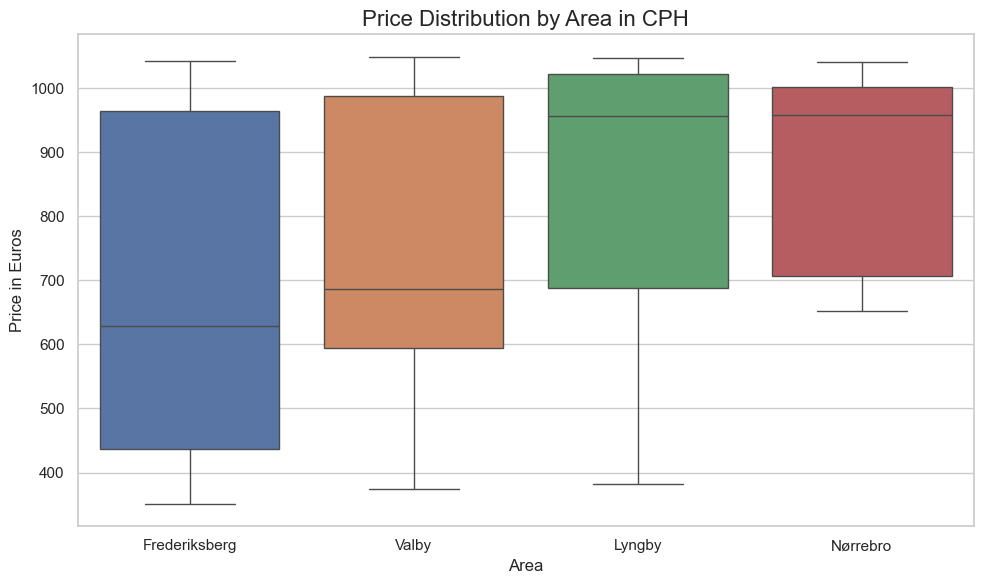

In [12]:
# Generate the Box-Plot of Price by area of Copenhagen.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Price', data=df, hue='Area', legend=False)

plt.title('Price Distribution by Area in CPH', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Price in Euros', fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
